# Import packages

In [1]:
#%pip install shap

In [2]:
import pickle
import pandas as pd
import numpy as np
import os
import shap
import spacy
import matplotlib.pyplot as plt

In [12]:
 # Define the RSE scoring function for the GridSearchCV model
def rse_scorer(y_true, y_pred):
    true_mean = np.mean(y_true)
    squared_error_num = np.sum(np.square(y_true - y_pred))
    squared_error_den = np.sum(np.square(y_true - true_mean))
    rse_loss = squared_error_num / squared_error_den
    return -rse_loss  # Note the negative sign since GridSearchCV maximizes the score

# Load data and lemmatize data

In [4]:
# Get all csv files from distilbert_data folder
db_file_path = '../datasets/distilbert_data/test/'
db_files = [file for file in os.listdir(db_file_path) if file.endswith('text_clean.csv')]
db_files

['EBIT_test__text_clean.csv',
 'EarningsPerShareDiluted_test__text_clean.csv',
 'NetIncomeLoss_test__text_clean.csv',
 'NetCashProvidedByUsedInFinancingActivities_test__text_clean.csv',
 'RevenueFromContractWithCustomerExcludingAssessedTax_test__text_clean.csv',
 'NetCashProvidedByUsedInInvestingActivities_test__text_clean.csv']

In [5]:
# Get all csv files from finbert_data folder
fb_file_path = '../datasets/finbert_data/test/'
fb_files = [file for file in os.listdir(fb_file_path) if file.endswith('text_clean.csv')]
fb_files

['EBIT_test__text_clean.csv',
 'EarningsPerShareDiluted_test__text_clean.csv',
 'NetIncomeLoss_test__text_clean.csv',
 'NetCashProvidedByUsedInFinancingActivities_test__text_clean.csv',
 'RevenueFromContractWithCustomerExcludingAssessedTax_test__text_clean.csv',
 'NetCashProvidedByUsedInInvestingActivities_test__text_clean.csv']

In [6]:
# Initialize spacy en model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize text
def lemmatize_text(text):
    '''
    Lemmatize text using spacy's en_core_web_sm model
    '''
    sent = nlp(text)
    return ' '.join([token.lemma_ for token in sent])

In [7]:
for file in db_files:
    print(f'Processing {file}...')
    # Read csv file
    df = pd.read_csv(db_file_path + file)
    # Lemmatize text
    df['text'] = df['text'].apply(lemmatize_text)
    # Save lemmatized text to csv file
    df.to_csv(db_file_path + file[:-15] + '_lemma.csv', index=False)

Processing EBIT_test__text_clean.csv...
Processing EarningsPerShareDiluted_test__text_clean.csv...
Processing NetIncomeLoss_test__text_clean.csv...
Processing NetCashProvidedByUsedInFinancingActivities_test__text_clean.csv...
Processing RevenueFromContractWithCustomerExcludingAssessedTax_test__text_clean.csv...
Processing NetCashProvidedByUsedInInvestingActivities_test__text_clean.csv...


In [8]:
for file in fb_files:
    print(f'Processing {file}...')
    # Read csv file
    df = pd.read_csv(fb_file_path + file)
    # Lemmatize text
    df['text'] = df['text'].apply(lemmatize_text)
    # Save lemmatized text to csv file
    df.to_csv(fb_file_path + file[:-15] + '_lemma.csv', index=False)

Processing EBIT_test__text_clean.csv...
Processing EarningsPerShareDiluted_test__text_clean.csv...
Processing NetIncomeLoss_test__text_clean.csv...


KeyboardInterrupt: 

# Load models and lemmatized data

In [10]:
# Get all csv files from distilbert_data folder
db_file_path = '../datasets/distilbert_data/train/'
db_files = [file for file in os.listdir(db_file_path) if file.endswith('lemma.csv')]
db_files.sort()
print(db_files)

# Load the corresponding distilbert model
db_model_path = '../models/random_forest/distilbert_data/'
db_models = [file for file in os.listdir(db_model_path) if file.endswith('.pkl')]
db_models.sort()
print(db_models)

['EBIT_train__lemma.csv', 'EarningsPerShareDiluted_train__lemma.csv', 'NetCashProvidedByUsedInFinancingActivities_train__lemma.csv', 'NetCashProvidedByUsedInInvestingActivities_train__lemma.csv', 'NetIncomeLoss_train__lemma.csv', 'RevenueFromContractWithCustomerExcludingAssessedTax_train__lemma.csv']
['EBIT_TF-IDF.pkl', 'EarningsPerShareDiluted_TF-IDF.pkl', 'NetCashProvidedByUsedInFinancingActivities_TF-IDF.pkl', 'NetCashProvidedByUsedInInvestingActivities_TF-IDF.pkl', 'NetIncomeLoss_TF-IDF.pkl', 'RevenueFromContractWithCustomerExcludingAssessedTax_TF-IDF.pkl']


In [5]:
# Get all csv files from distilbert_data folder
fb_file_path = '../datasets/finbert_data/train/'
fb_files = [file for file in os.listdir(fb_file_path) if file.endswith('lemma.csv')]
fb_files.sort()
print(fb_files)

# Load the corresponding finbert model
fb_model_path = '../models/random_forest/finbert_data/'
fb_models = [file for file in os.listdir(fb_model_path) if file.endswith('.pkl')]
fb_models.sort()
print(fb_models)

['EBIT_train__lemma.csv', 'EarningsPerShareDiluted_train__lemma.csv', 'NetCashProvidedByUsedInFinancingActivities_train__lemma.csv', 'NetCashProvidedByUsedInInvestingActivities_train__lemma.csv', 'NetIncomeLoss_train__lemma.csv', 'RevenueFromContractWithCustomerExcludingAssessedTax_train__lemma.csv']
['EBIT_TF-IDF.pkl', 'EarningsPerShareDiluted_TF-IDF.pkl', 'NetCashProvidedByUsedInFinancingActivities_TF-IDF.pkl', 'NetCashProvidedByUsedInInvestingActivities_TF-IDF.pkl', 'NetIncomeLoss_TF-IDF.pkl', 'RevenueFromContractWithCustomerExcludingAssessedTax_TF-IDF.pkl']


In [8]:
# Function to load data and model
def load_data_model(file_path, file_name, model_path, model_name):
    # Load data 
    data = pd.read_csv(file_path + file_name)
    # Load model
    with open(model_path + model_name, 'rb') as file:
        model = pickle.load(file)
    return data, model

In [13]:
data, model = load_data_model(db_file_path, db_files[0], db_model_path, db_models[0])
model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.95, min_df=9)),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 4, 8],
                         'rf__max_features': [1.0, 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 5, 10],
                         'rf__min_samples_split': [2, 10, 20],
                         'rf__n_estimators': [100, 200, 500]},
             scoring=make_scorer(rse_scorer))

# Interpret model with SHAP

In [3]:
# Function to interpret model with SHAP
def shap_interpret_model(data, model):
    # Access the underlying model
    best_model = model.best_estimator_['rf']
    
    # Access the TF-IDF vectorizer from the pipeline
    vectorizer = model.best_estimator_['tfidf']
    
    # Transform the data using the vectorizer
    text_data_transformed = vectorizer.fit_transform(data['text'])
    
    # Transform data to DataFrame
    df_text = pd.DataFrame.sparse.from_spmatrix(text_data_transformed)
    
    # Create explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Create shap values
    shap_values = explainer.shap_values(df_text, approximate=True)
    
    # Create a summary plot, showing top 10 features
    shap.summary_plot(shap_values, features=df_text, feature_names=vectorizer.get_feature_names_out(), max_display=10, plot_type="bar")
    
    # Create a summary plot, showing all features
    shap.summary_plot(shap_values, features=df_text, feature_names=vectorizer.get_feature_names_out(), max_display=10)
    
    
    #return explainer, shap_values

In [ ]:
# Access the underlying model
best_model = model.best_estimator_['rf']

# Access the TF-IDF vectorizer from the pipeline
vectorizer = model.best_estimator_['tfidf']

# Transform the data using the vectorizer
text_data_transformed = vectorizer.fit_transform(data['text'])

# Transform data to DataFrame
df_text = pd.DataFrame.sparse.from_spmatrix(text_data_transformed)

# Create explainer
explainer = shap.TreeExplainer(best_model)

# Create shap values
shap_values = explainer.shap_values(df_text)


## Interpret random forest of DistilBERT's data

--------------INTERPRETING RANDOM FOREST MODEL OF EBIT--------------


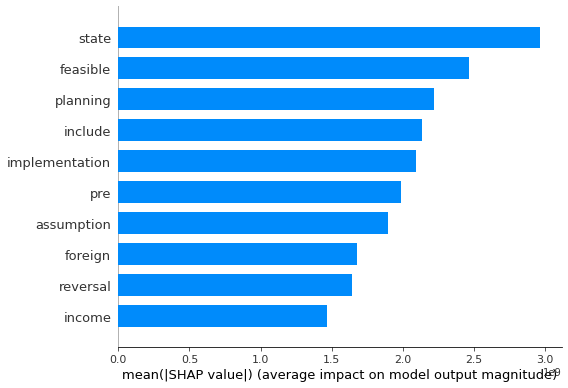

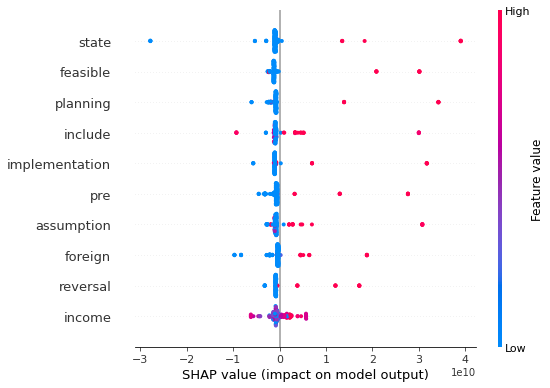



--------------INTERPRETING RANDOM FOREST MODEL OF EarningsPerShareDiluted--------------


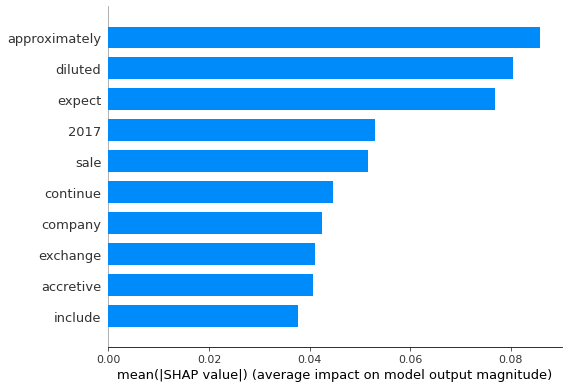

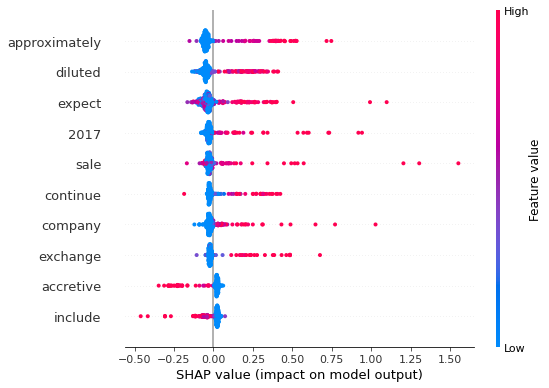



--------------INTERPRETING RANDOM FOREST MODEL OF NetCashProvidedByUsedInFinancingActivities--------------


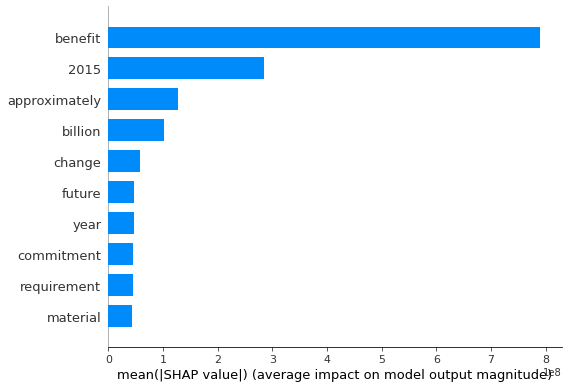

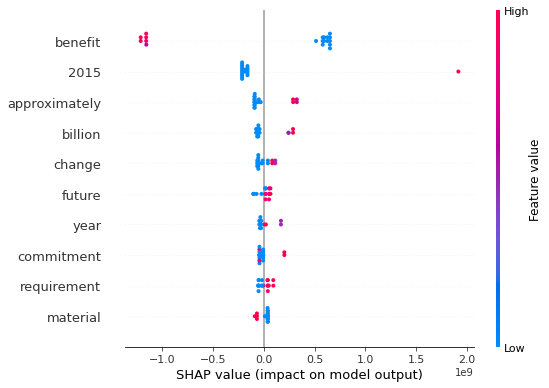



--------------INTERPRETING RANDOM FOREST MODEL OF NetCashProvidedByUsedInInvestingActivities--------------


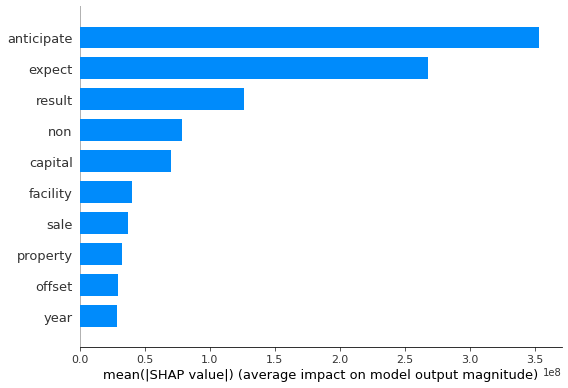

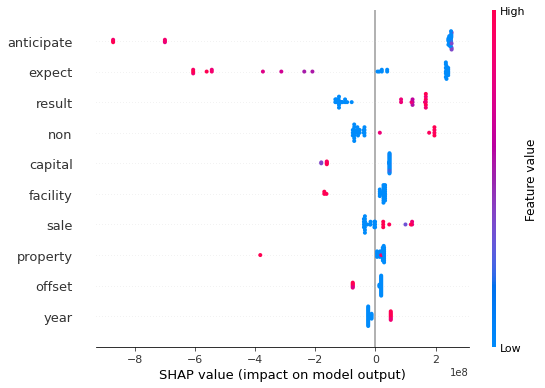



--------------INTERPRETING RANDOM FOREST MODEL OF NetIncomeLoss--------------


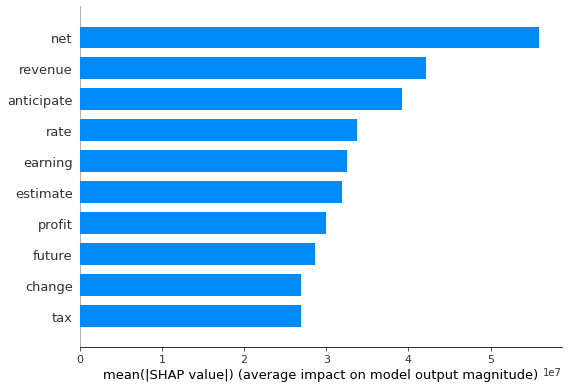

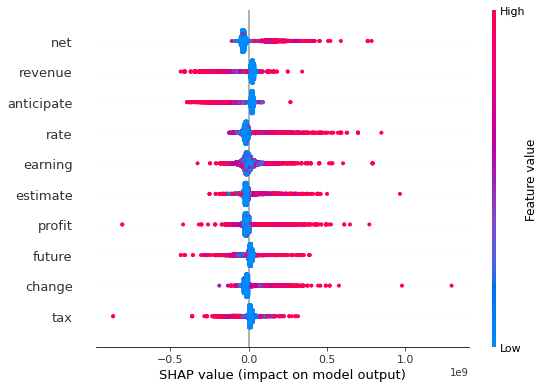



--------------INTERPRETING RANDOM FOREST MODEL OF RevenueFromContractWithCustomerExcludingAssessedTax--------------


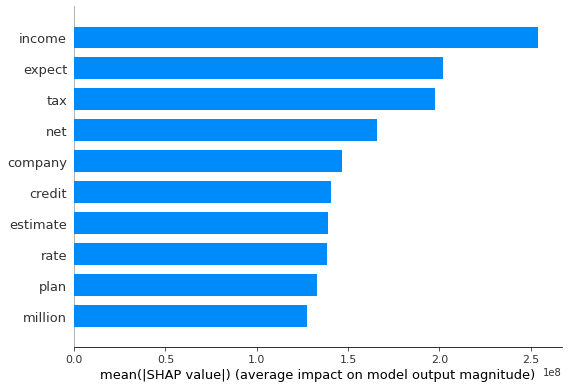

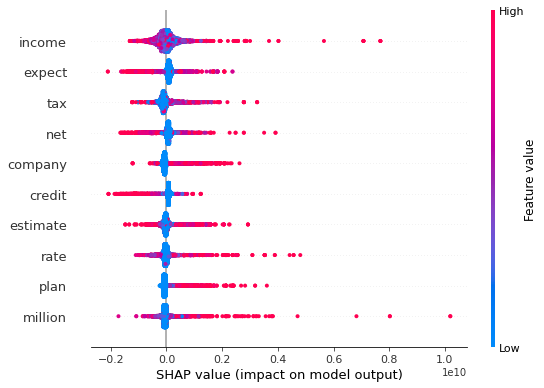

In [7]:
for i in range(len(db_files)):
    metric_name = db_files[i].split('.')[0].split('_')[0]
    
    print(f"--------------INTERPRETING RANDOM FOREST MODEL OF {metric_name}--------------")
    data, model = load_data_model(db_file_path, db_files[i], db_model_path, db_models[i])
    shap_interpret_model(data, model)
    print("\n")

## Interpret random forest of FinBERT's data

--------------INTERPRETING RANDOM FOREST MODEL OF EBIT--------------


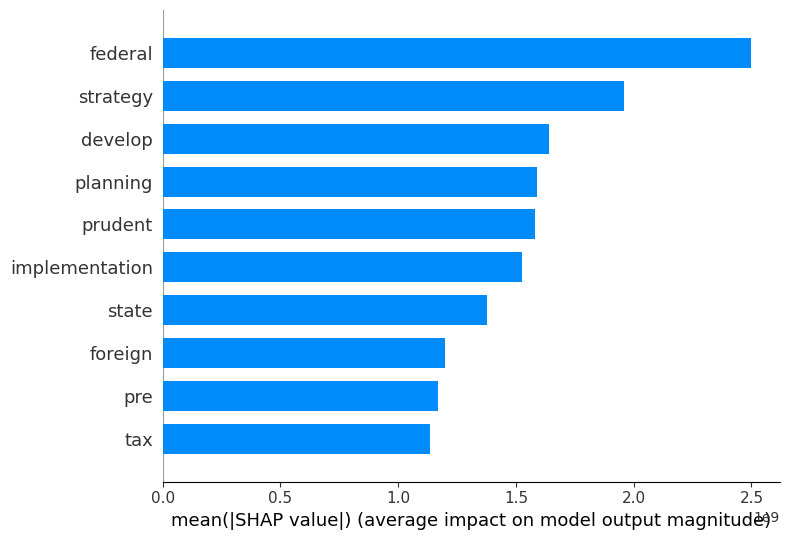

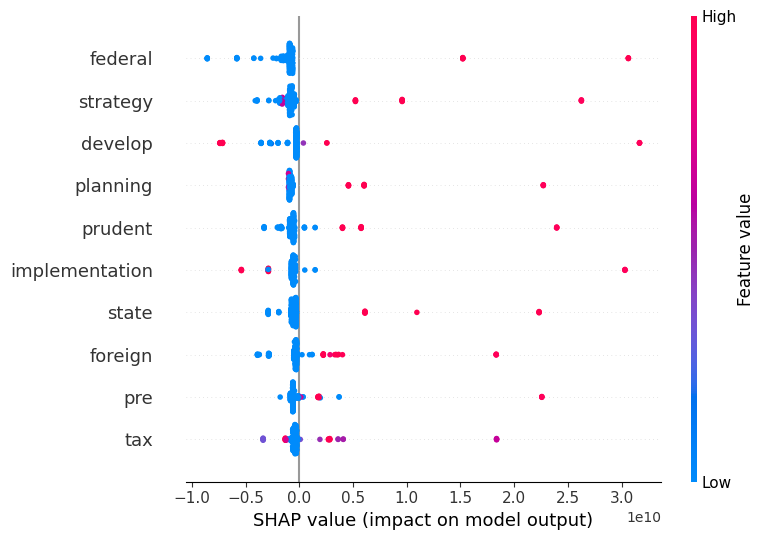



--------------INTERPRETING RANDOM FOREST MODEL OF EarningsPerShareDiluted--------------


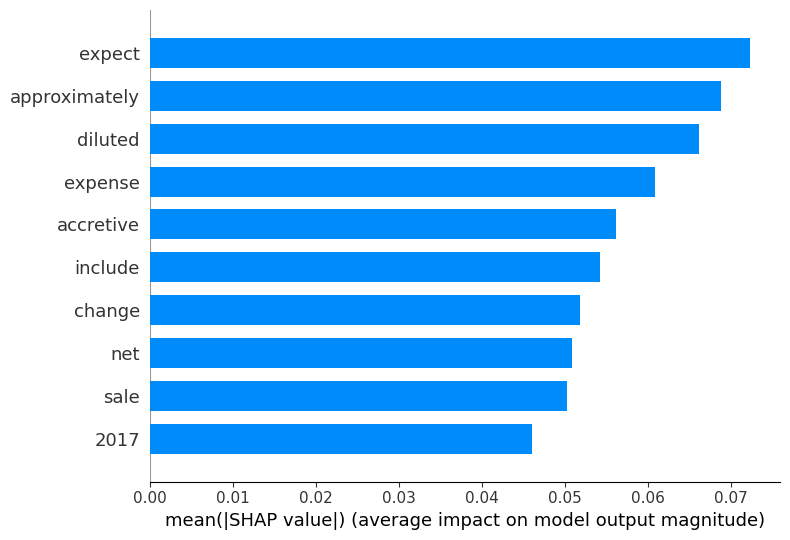

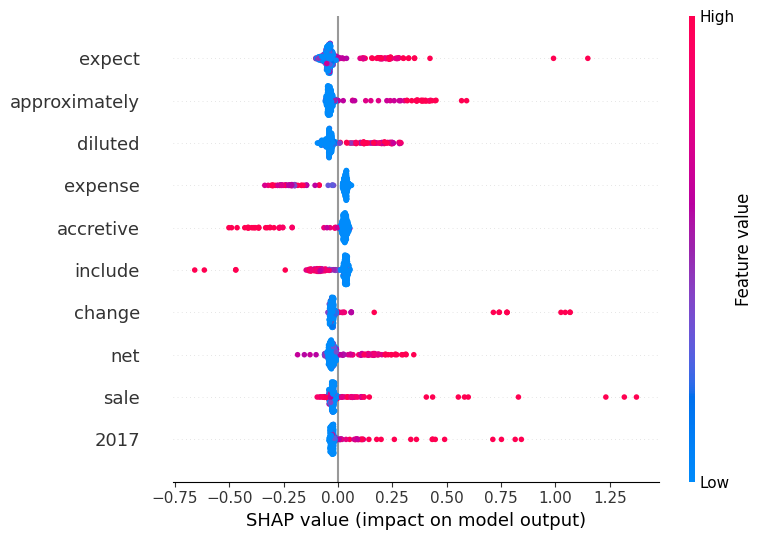



--------------INTERPRETING RANDOM FOREST MODEL OF NetCashProvidedByUsedInFinancingActivities--------------


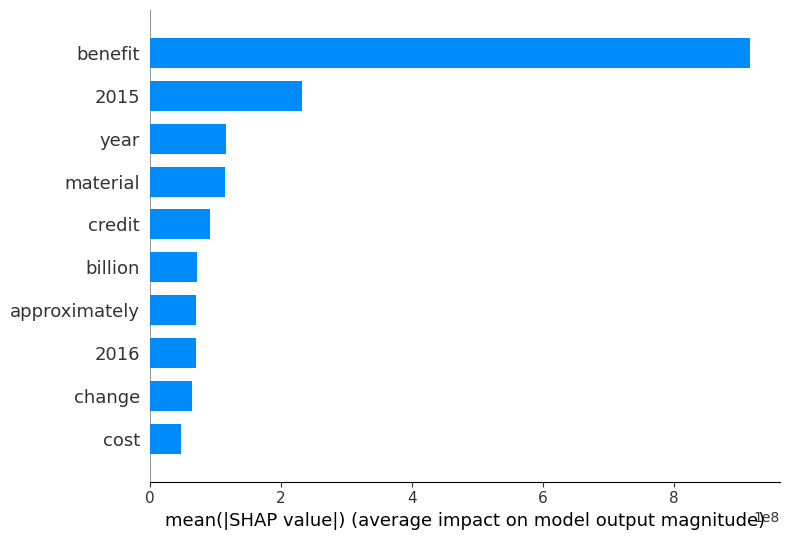

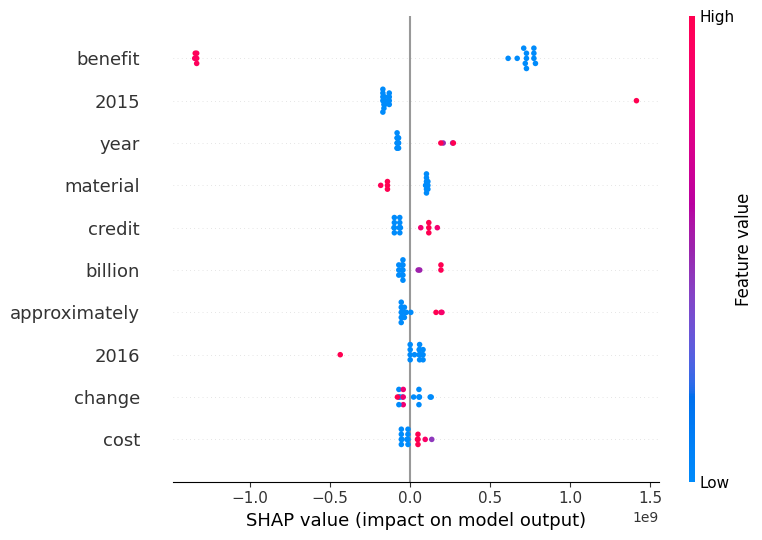



--------------INTERPRETING RANDOM FOREST MODEL OF NetCashProvidedByUsedInInvestingActivities--------------


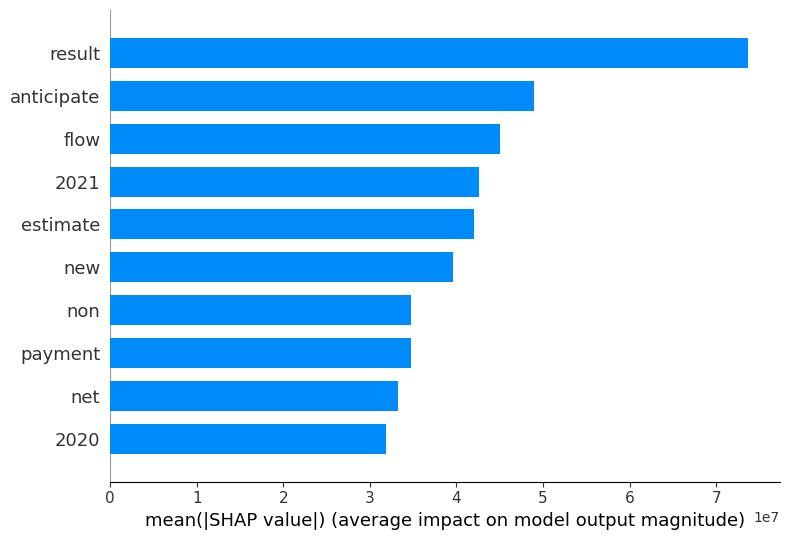

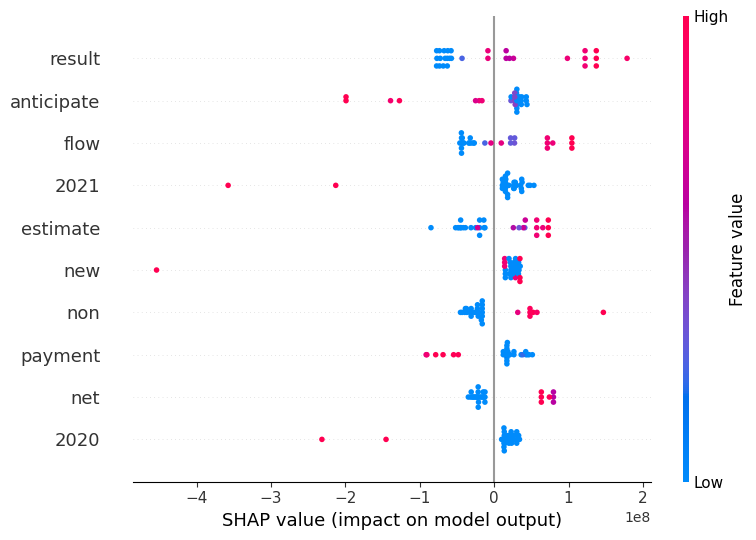



--------------INTERPRETING RANDOM FOREST MODEL OF NetIncomeLoss--------------


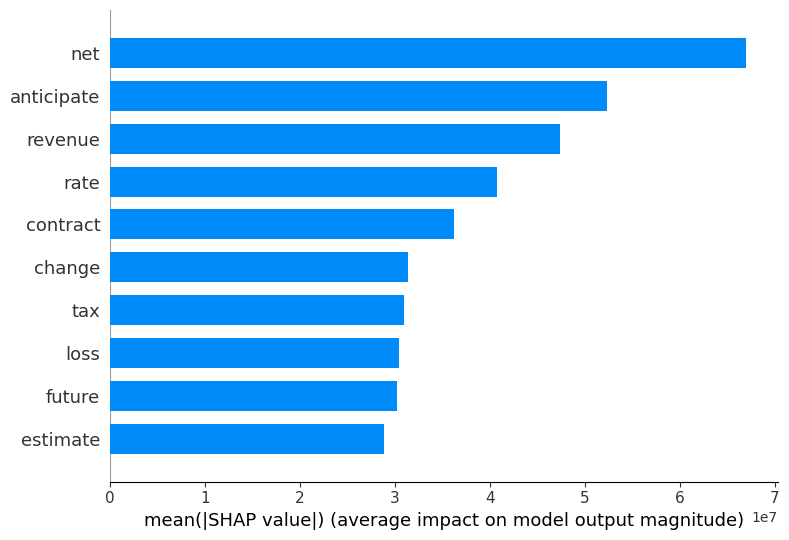

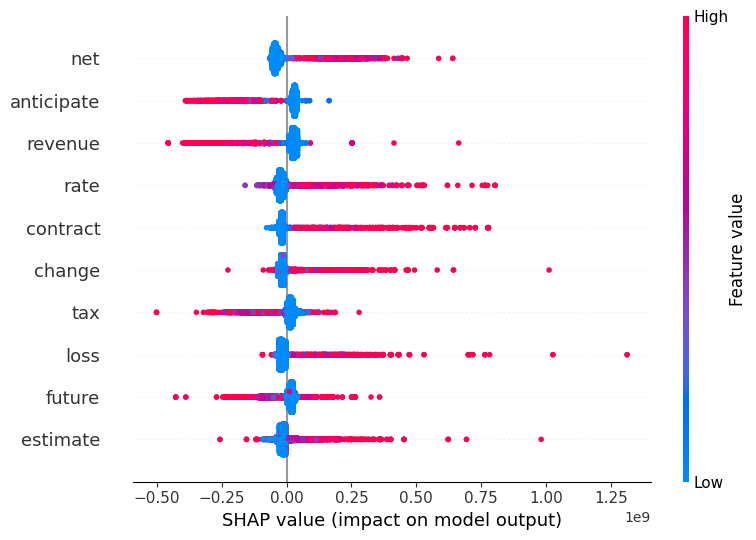



--------------INTERPRETING RANDOM FOREST MODEL OF RevenueFromContractWithCustomerExcludingAssessedTax--------------


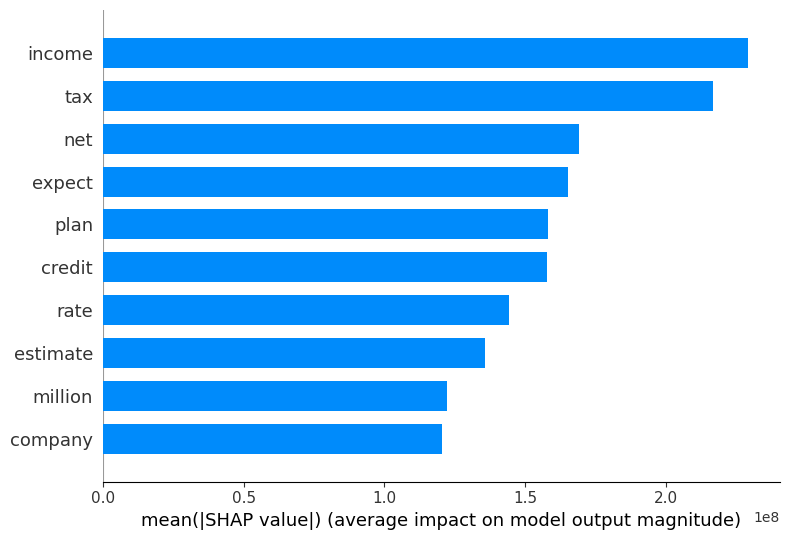

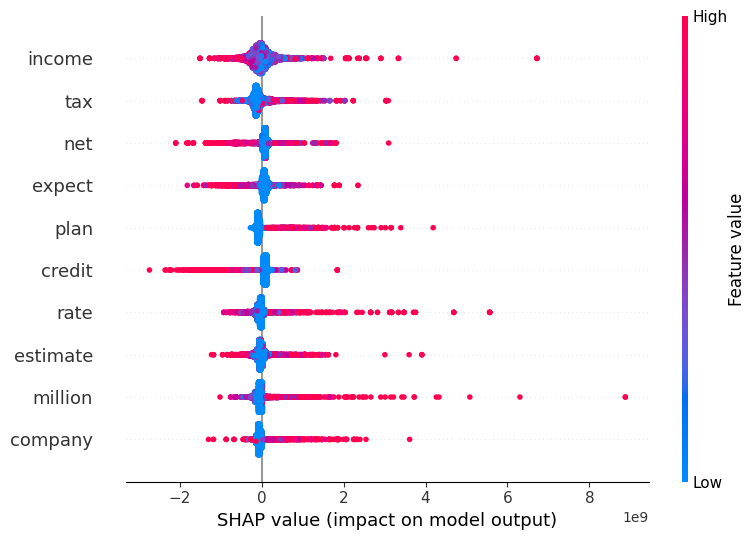

In [14]:
for i in range(len(fb_files)):
    metric_name = fb_files[i].split('.')[0].split('_')[0]
    
    print(f"--------------INTERPRETING RANDOM FOREST MODEL OF {metric_name}--------------")
    data, model = load_data_model(fb_file_path, fb_files[i], fb_model_path, fb_models[i])
    shap_interpret_model(data, model)
    print("\n")